In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
grouped_df = pd.read_csv('grouped_results-0215.csv', index_col=[0,1], usecols=[0, 1, 2, 5])

In [47]:
grouped_df

run_time       mxe
pde                         method                        
GrayScottEquation           pinn     1368.741412  0.982952
                            r3       1408.960707  0.983428
                            rad      1364.386286  0.982959
                            randomr  1862.752130  0.982389
                            rard     1369.688748  0.983631
                            rarg     1378.145116  0.982388
KuramotoSivashinskyEquation pinn      646.392361  3.684013
                            r3        668.901778  4.004361
                            rad       624.863987  3.787770
                            randomr   865.313329  3.570095
                            rard      624.486052  3.745630
                            rarg      620.600410  3.722091

In [48]:
all_pdes = grouped_df.index.unique(level='pde')
all_methods =  grouped_df.index.unique(level='method')
M = len(all_methods)
P = len(all_pdes)

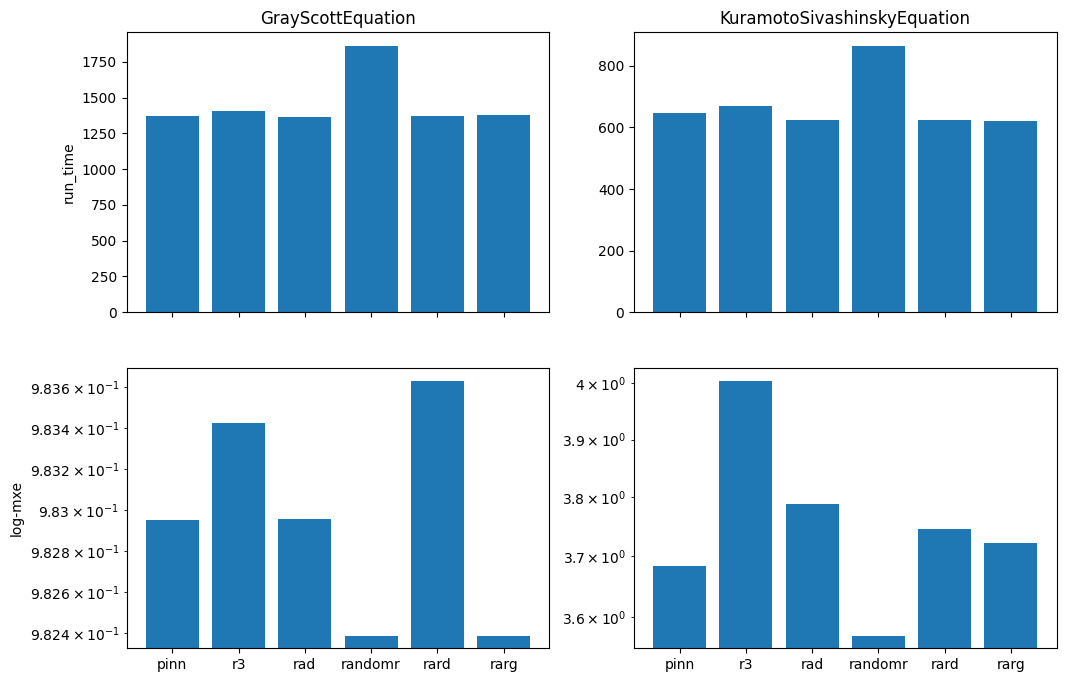

In [49]:
# compare runtime-los-mes-relerr
K = grouped_df.shape[1]
fig, axes = plt.subplots(K, P, figsize=(5*P + P, 3 * K + K), sharex=True)
for k, figname in enumerate(grouped_df.columns):
    for i, pde in enumerate(all_pdes):
        res = grouped_df.iloc[i * M:(i + 1) * M, k].values
        axes[0,i].set_title(pde)
        axes[k,i].bar(all_methods, res)
        axes[1,i].set_yscale('log')
    axes[k,0].set_ylabel(f"{'log-' * k}{figname}")
